In [1]:
## Winter Project

# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
import geopandas as gpd
import descartes
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data from UNICEF
overweight = pd.read_csv("C:\\Users\\Kimberly\\Documents\\GitHub\\WinterProject\\Data\\fusion_GLOBAL_DATAFLOW_UNICEF_1.0_overweight.csv")
display(overweight)

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
0,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1950,3652.874,3: Thousands,PS: Persons,NaN,NaN,...,NaN,NaN,NaN,UNPD2019,NaN,NaN,NaN,NaN,NaN,NaN
1,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1951,3705.395,3: Thousands,PS: Persons,NaN,NaN,...,NaN,NaN,NaN,UNPD2019,NaN,NaN,NaN,NaN,NaN,NaN
2,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1952,3761.546,3: Thousands,PS: Persons,NaN,NaN,...,NaN,NaN,NaN,UNPD2019,NaN,NaN,NaN,NaN,NaN,NaN
3,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1953,3821.348,3: Thousands,PS: Persons,NaN,NaN,...,NaN,NaN,NaN,UNPD2019,NaN,NaN,NaN,NaN,NaN,NaN
4,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1954,3884.832,3: Thousands,PS: Persons,NaN,NaN,...,NaN,NaN,NaN,UNPD2019,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067581,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SXM: Sint Maarten,SPP_GDPPC: GDP per capita (current US$),_T: Total,2018,29160.10381,NaN,USD: USD,NaN,NaN,...,NaN,NaN,Expressed in Current US Dollars,World Bank Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN
1067582,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SXM: Sint Maarten,MG_INTNL_MG_CNTRY_DEST: International migrants...,_T: Total,2020,29,3: Thousands,PS: Persons,NaN,NaN,...,NaN,From UNPD: UNMigrantStock2020,NaN,International migrant stock: United Nations De...,NaN,NaN,NaN,NaN,NaN,_T: Total
1067583,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SXM: Sint Maarten,"MG_RFGS_CNTRY_ASYLM: Refugees, by country of a...",_T: Total,2020,10,1: Tens,PS: Persons,NaN,NaN,...,NaN,From UNHCR: GlobalTrends2020,NaN,Refugees: United Nations High Commissioner for...,NaN,NaN,NaN,NaN,NaN,_T: Total
1067584,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SXM: Sint Maarten,MG_RFGS_CNTRY_ASYLM_PER1000: Refugees by host ...,_T: Total,2020,0.233198078447834,NaN,PER1000: Per 1000,NaN,NaN,...,NaN,From UNHCR: GlobalTrends2020. National populat...,NaN,Refugees: United Nations High Commissioner for...,NaN,NaN,NaN,NaN,NaN,_T: Total


In [3]:
columns = overweight.columns.values.tolist()
print('There are', len(columns), 'columns named as follows:\n', columns)

There are 22 columns named as follows:
 ['DATAFLOW', 'REF_AREA:Geographic area', 'INDICATOR:Indicator', 'SEX:Sex', 'TIME_PERIOD:Time period', 'OBS_VALUE:Observation Value', 'UNIT_MULTIPLIER:Unit multiplier', 'UNIT_MEASURE:Unit of measure', 'OBS_STATUS:Observation Status', 'OBS_CONF:Observation confidentaility', 'LOWER_BOUND:Lower Bound', 'UPPER_BOUND:Upper Bound', 'WGTD_SAMPL_SIZE:Weighted Sample Size', 'OBS_FOOTNOTE:Observation footnote', 'SERIES_FOOTNOTE:Series footnote', 'DATA_SOURCE:Data Source', 'SOURCE_LINK:Citation of or link to the data source', 'CUSTODIAN:Custodian', 'TIME_PERIOD_METHOD:Time period activity related to when the data are collected', 'REF_PERIOD:Reference Period', 'COVERAGE_TIME:The period of time for which data are provided', 'AGE:Current age']


### Filter the years 1970 forward

In [4]:
overweight['TIME_PERIOD:Time period'].describe()

count     1067586
unique        280
top          2019
freq        34602
Name: TIME_PERIOD:Time period, dtype: object

In [5]:
# convert to datetime type and reduce to year/month
overweight['TIME_PERIOD:Time period'] = pd.to_datetime(overweight['TIME_PERIOD:Time period'])

#extract only year to better align data (some rows had month)
overweight['TIME_PERIOD:Time period'] = overweight['TIME_PERIOD:Time period'].dt.strftime('%Y')

In [6]:
#overweight['TIME_PERIOD:Time period'] = overweight['TIME_PERIOD:Time period'].astype(int)
overweight_filtered = overweight.loc[(overweight['TIME_PERIOD:Time period'] >= '1970')].reset_index(drop=True)
display(overweight_filtered)

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
0,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1970,5476.63,3: Thousands,PS: Persons,NaN,NaN,...,NaN,NaN,NaN,UNPD2019,NaN,NaN,NaN,NaN,NaN,NaN
1,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1971,5630.099,3: Thousands,PS: Persons,NaN,NaN,...,NaN,NaN,NaN,UNPD2019,NaN,NaN,NaN,NaN,NaN,NaN
2,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1972,5790.327,3: Thousands,PS: Persons,NaN,NaN,...,NaN,NaN,NaN,UNPD2019,NaN,NaN,NaN,NaN,NaN,NaN
3,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1973,5951.12,3: Thousands,PS: Persons,NaN,NaN,...,NaN,NaN,NaN,UNPD2019,NaN,NaN,NaN,NaN,NaN,NaN
4,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1974,6104.377,3: Thousands,PS: Persons,NaN,NaN,...,NaN,NaN,NaN,UNPD2019,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973686,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SXM: Sint Maarten,SPP_GDPPC: GDP per capita (current US$),_T: Total,2018,29160.10381,NaN,USD: USD,NaN,NaN,...,NaN,NaN,Expressed in Current US Dollars,World Bank Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN
973687,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SXM: Sint Maarten,MG_INTNL_MG_CNTRY_DEST: International migrants...,_T: Total,2020,29,3: Thousands,PS: Persons,NaN,NaN,...,NaN,From UNPD: UNMigrantStock2020,NaN,International migrant stock: United Nations De...,NaN,NaN,NaN,NaN,NaN,_T: Total
973688,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SXM: Sint Maarten,"MG_RFGS_CNTRY_ASYLM: Refugees, by country of a...",_T: Total,2020,10,1: Tens,PS: Persons,NaN,NaN,...,NaN,From UNHCR: GlobalTrends2020,NaN,Refugees: United Nations High Commissioner for...,NaN,NaN,NaN,NaN,NaN,_T: Total
973689,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SXM: Sint Maarten,MG_RFGS_CNTRY_ASYLM_PER1000: Refugees by host ...,_T: Total,2020,0.233198078447834,NaN,PER1000: Per 1000,NaN,NaN,...,NaN,From UNHCR: GlobalTrends2020. National populat...,NaN,Refugees: United Nations High Commissioner for...,NaN,NaN,NaN,NaN,NaN,_T: Total


### Filter out columns that have 20% or more missing values

In [7]:
# filter out the columns with more than 20% na values (threshold is counding non-na values)
nrows = len(overweight_filtered.index)
t = round(nrows * .8)
print('Filtering out columns with', nrows-t, 'NA values (20%) or more out of the', nrows, 'rows total.')
overweight_filtered2 = overweight_filtered.dropna(axis=1, thresh=t)
display(overweight_filtered2)

Filtering out columns with 194738 NA values (20%) or more out of the 973691 rows total.


,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MEASURE:Unit of measure,DATA_SOURCE:Data Source,AGE:Current age
0,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1970,5476.63,PS: Persons,UNPD2019,NaN
1,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1971,5630.099,PS: Persons,UNPD2019,NaN
2,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1972,5790.327,PS: Persons,UNPD2019,NaN
3,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1973,5951.12,PS: Persons,UNPD2019,NaN
4,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1974,6104.377,PS: Persons,UNPD2019,NaN
...,...,...,...,...,...,...,...,...,...
973686,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SXM: Sint Maarten,SPP_GDPPC: GDP per capita (current US$),_T: Total,2018,29160.10381,USD: USD,World Bank Development Indicators,NaN
973687,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SXM: Sint Maarten,MG_INTNL_MG_CNTRY_DEST: International migrants...,_T: Total,2020,29,PS: Persons,International migrant stock: United Nations De...,_T: Total
973688,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SXM: Sint Maarten,"MG_RFGS_CNTRY_ASYLM: Refugees, by country of a...",_T: Total,2020,10,PS: Persons,Refugees: United Nations High Commissioner for...,_T: Total
973689,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SXM: Sint Maarten,MG_RFGS_CNTRY_ASYLM_PER1000: Refugees by host ...,_T: Total,2020,0.233198078447834,PER1000: Per 1000,Refugees: United Nations High Commissioner for...,_T: Total


In [8]:
cols = overweight_filtered2.columns.values.tolist()
print('There are', len(cols), 'columns remaining named as follows:\n', cols)

There are 9 columns remaining named as follows:
 ['DATAFLOW', 'REF_AREA:Geographic area', 'INDICATOR:Indicator', 'SEX:Sex', 'TIME_PERIOD:Time period', 'OBS_VALUE:Observation Value', 'UNIT_MEASURE:Unit of measure', 'DATA_SOURCE:Data Source', 'AGE:Current age']


### Rename the remaining columns for easier reading

In [9]:
def refine_name(n):
    pattern = re.compile(r'.*:(.*)')
    title = re.findall(pattern, n)
#    print('title', title)
    if not title: #len(title) <=1:
        title = [n]
    return title[0]

new_col_names = {}
for c in cols:
#    print('working on column', c)
    new_c = refine_name(c)
#    print('column name refined to', new_c)
    new_col_names[c] = new_c
print('Simplifying the column names as defined:\n', new_col_names)

Simplifying the column names as defined:
 {'DATAFLOW': 'DATAFLOW', 'REF_AREA:Geographic area': 'Geographic area', 'INDICATOR:Indicator': 'Indicator', 'SEX:Sex': 'Sex', 'TIME_PERIOD:Time period': 'Time period', 'OBS_VALUE:Observation Value': 'Observation Value', 'UNIT_MEASURE:Unit of measure': 'Unit of measure', 'DATA_SOURCE:Data Source': 'Data Source', 'AGE:Current age': 'Current age'}


In [10]:
overweight_filtered2.rename(columns=new_col_names, inplace=True)
display(overweight_filtered2)

,DATAFLOW,Geographic area,Indicator,Sex,Time period,Observation Value,Unit of measure,Data Source,Current age
0,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1970,5476.63,PS: Persons,UNPD2019,NaN
1,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1971,5630.099,PS: Persons,UNPD2019,NaN
2,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1972,5790.327,PS: Persons,UNPD2019,NaN
3,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1973,5951.12,PS: Persons,UNPD2019,NaN
4,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1974,6104.377,PS: Persons,UNPD2019,NaN
...,...,...,...,...,...,...,...,...,...
973686,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SXM: Sint Maarten,SPP_GDPPC: GDP per capita (current US$),_T: Total,2018,29160.10381,USD: USD,World Bank Development Indicators,NaN
973687,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SXM: Sint Maarten,MG_INTNL_MG_CNTRY_DEST: International migrants...,_T: Total,2020,29,PS: Persons,International migrant stock: United Nations De...,_T: Total
973688,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SXM: Sint Maarten,"MG_RFGS_CNTRY_ASYLM: Refugees, by country of a...",_T: Total,2020,10,PS: Persons,Refugees: United Nations High Commissioner for...,_T: Total
973689,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,SXM: Sint Maarten,MG_RFGS_CNTRY_ASYLM_PER1000: Refugees by host ...,_T: Total,2020,0.233198078447834,PER1000: Per 1000,Refugees: United Nations High Commissioner for...,_T: Total


### Filter out the geographical regions and leave only data associated with individual countries

In [11]:
countries = overweight_filtered2['Geographic area'].unique()
print('Starting with a list of', len(countries), 'country names.')

Starting with a list of 332 country names.


In [12]:
# if there is an underscore in the geographic area value then it is a region and not a country
def refine_countries(x):
    pattern = re.compile(r'.*_.*')
    region = re.findall(pattern, x)
    if not region:
        return x
    else:
        return 'NaN'

refined_countries = []   
for c in countries:
    c2 = refine_countries(c)
    if c2 != 'NaN':
        refined_countries.append(c2)
print('After removing region names, we are left with', len(refined_countries), 'unique country names.')

After removing region names, we are left with 236 unique country names.


In [13]:
overweight_filtered3 = overweight_filtered2[overweight_filtered2['Geographic area'].isin(refined_countries)]
overweight_filtered3.drop('DATAFLOW', axis=1, inplace=True)
overweight_filtered3.reset_index(inplace=True, drop=True)
display(overweight_filtered3)

,Geographic area,Indicator,Sex,Time period,Observation Value,Unit of measure,Data Source,Current age
0,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1970,5476.63,PS: Persons,UNPD2019,NaN
1,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1971,5630.099,PS: Persons,UNPD2019,NaN
2,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1972,5790.327,PS: Persons,UNPD2019,NaN
3,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1973,5951.12,PS: Persons,UNPD2019,NaN
4,AFG: Afghanistan,DM_POP_TOT: Total population,F: Female,1974,6104.377,PS: Persons,UNPD2019,NaN
...,...,...,...,...,...,...,...,...
878523,SXM: Sint Maarten,SPP_GDPPC: GDP per capita (current US$),_T: Total,2018,29160.10381,USD: USD,World Bank Development Indicators,NaN
878524,SXM: Sint Maarten,MG_INTNL_MG_CNTRY_DEST: International migrants...,_T: Total,2020,29,PS: Persons,International migrant stock: United Nations De...,_T: Total
878525,SXM: Sint Maarten,"MG_RFGS_CNTRY_ASYLM: Refugees, by country of a...",_T: Total,2020,10,PS: Persons,Refugees: United Nations High Commissioner for...,_T: Total
878526,SXM: Sint Maarten,MG_RFGS_CNTRY_ASYLM_PER1000: Refugees by host ...,_T: Total,2020,0.233198078447834,PER1000: Per 1000,Refugees: United Nations High Commissioner for...,_T: Total


### Split the "Geographic area" column into country and ISO code (alpha-3)

In [14]:
country_split = overweight_filtered3['Geographic area'].str.split(': ', n=1, expand=True)
#display(country_split)
overweight_filtered3['COUNTRYAFF'] = country_split[1]
overweight_filtered3['ISO-3'] = country_split[0]
overweight_filtered4 = overweight_filtered3.drop(columns=['Geographic area'])
display(overweight_filtered4)

,Indicator,Sex,Time period,Observation Value,Unit of measure,Data Source,Current age,COUNTRYAFF,ISO-3
0,DM_POP_TOT: Total population,F: Female,1970,5476.63,PS: Persons,UNPD2019,NaN,Afghanistan,AFG
1,DM_POP_TOT: Total population,F: Female,1971,5630.099,PS: Persons,UNPD2019,NaN,Afghanistan,AFG
2,DM_POP_TOT: Total population,F: Female,1972,5790.327,PS: Persons,UNPD2019,NaN,Afghanistan,AFG
3,DM_POP_TOT: Total population,F: Female,1973,5951.12,PS: Persons,UNPD2019,NaN,Afghanistan,AFG
4,DM_POP_TOT: Total population,F: Female,1974,6104.377,PS: Persons,UNPD2019,NaN,Afghanistan,AFG
...,...,...,...,...,...,...,...,...,...
878523,SPP_GDPPC: GDP per capita (current US$),_T: Total,2018,29160.10381,USD: USD,World Bank Development Indicators,NaN,Sint Maarten,SXM
878524,MG_INTNL_MG_CNTRY_DEST: International migrants...,_T: Total,2020,29,PS: Persons,International migrant stock: United Nations De...,_T: Total,Sint Maarten,SXM
878525,"MG_RFGS_CNTRY_ASYLM: Refugees, by country of a...",_T: Total,2020,10,PS: Persons,Refugees: United Nations High Commissioner for...,_T: Total,Sint Maarten,SXM
878526,MG_RFGS_CNTRY_ASYLM_PER1000: Refugees by host ...,_T: Total,2020,0.233198078447834,PER1000: Per 1000,Refugees: United Nations High Commissioner for...,_T: Total,Sint Maarten,SXM


### Filter the "Current age" to include only children under age 5

In [15]:
ages = overweight_filtered4['Current age'].unique()
print(ages)
# we want to leave only the value 'Y0T4: Under 5 years old'
overweight_filtered5 = overweight_filtered4[overweight_filtered4['Current age'].isin(['Y0T4: Under 5 years old'])]
overweight_filtered5.reset_index(inplace=True, drop=True)
display(overweight_filtered5)

[nan '_T: Total' 'Y15T19: 15 to 19 years old' 'Y15T49: 15 to 49 years old'
 'Y11T17: 11 to 17 years old' 'Y0T4: Under 5 years old'
 'Y20T24: 20 to 24 years old' 'M36T59: 36 to 59 months old'
 'Y5T17: 5 to 17 years old' 'Y13T15: 13 to 15 years'
 'Y10T14: 10 to 14 years old' 'Y15T24: 15 to 24 years old'
 'M12T15: 12 to 15 months old' 'M12T23: 12 to 23 months old'
 'M20T23: 20 to 23 months old' 'M0T23: Under 24 months old'
 'M0T5: Under 6 months old' 'M6T23: 6 to 23 months old'
 'Y0: Under 1 year old' 'M6T59: 6 to 59 months old'
 'Y15T17: 15 to 17 years old' 'Y18T29: 18 to 29 years old'
 'Y10T19: 10 to 19 years old' 'Y5T14: 5 to 14 years old'
 'Y0T14: Under 15 years old' 'Y3T5: 3 to 5 years old'
 'Y4T6: 4 to 6 years old' 'M24T59: 24 to 59 months old'
 'Y7T17: 7 to 17 years old' 'M0T47: Under 48 months old'
 'Y6T17: 6 to 17 years old' 'Y10T17: 10 to 17 years old'
 'M36T47: 36 to 47 months old' 'Y3T6: 3 to 6 years old']


,Indicator,Sex,Time period,Observation Value,Unit of measure,Data Source,Current age,COUNTRYAFF,ISO-3
0,NT_ANT_BAZ_AVG: Mean BMI-for-age,F: Female,2004,-0.1,NUMBER: Number,Summary report of the national nutrition surve...,Y0T4: Under 5 years old,Afghanistan,AFG
1,NT_ANT_BAZ_AVG: Mean BMI-for-age,F: Female,2013,-0.1,NUMBER: Number,Afghanistan National Nutrition Survey 2013,Y0T4: Under 5 years old,Afghanistan,AFG
2,NT_ANT_BAZ_AVG: Mean BMI-for-age,F: Female,2018,0.1,NUMBER: Number,Afghanistan Health Survey 2018,Y0T4: Under 5 years old,Afghanistan,AFG
3,NT_ANT_BAZ_NE2: BMI-for-age <-2 SD,F: Female,2004,8.1,PCNT: %,Summary report of the national nutrition surve...,Y0T4: Under 5 years old,Afghanistan,AFG
4,NT_ANT_BAZ_NE2: BMI-for-age <-2 SD,F: Female,2013,8.3,PCNT: %,Afghanistan National Nutrition Survey 2013,Y0T4: Under 5 years old,Afghanistan,AFG
...,...,...,...,...,...,...,...,...,...
88448,MNCH_ORSZINC: Diarrhoea treatment - percentage...,_T: Total,2015,15.1,PCNT: %,Demographic and Health Survey 2015,Y0T4: Under 5 years old,Zimbabwe,ZWE
88449,MNCH_ORSZINC: Diarrhoea treatment - percentage...,_T: Total,2019,22.5,PCNT: %,Multiple Indicator Cluster Survey 2019,Y0T4: Under 5 years old,Zimbabwe,ZWE
88450,ECD_CHLD_U5_BKS-HM: Percentage of children und...,_T: Total,2019,3.2,PCNT: %,MICS 2019,Y0T4: Under 5 years old,Zimbabwe,ZWE
88451,ECD_CHLD_U5_LFT-ALN: Percentage of children un...,_T: Total,2019,20.4,PCNT: %,MICS 2019,Y0T4: Under 5 years old,Zimbabwe,ZWE


### 'Sex' doesn't need to be split by gender, only the Total is needed

In [16]:
overweight_filtered5['Sex'].unique()

array(['F: Female', 'M: Male', '_T: Total'], dtype=object)

In [17]:
overweight_filtered6 = overweight_filtered5.loc[overweight_filtered5['Sex'] == '_T: Total'].reset_index(drop=True)
display(overweight_filtered6)

,Indicator,Sex,Time period,Observation Value,Unit of measure,Data Source,Current age,COUNTRYAFF,ISO-3
0,NT_ANT_HAZ_NE2: Height-for-age <-2 SD (stunting),_T: Total,1997,53.2,PCNT: %,Afghanistan 1997 multiple indicator baseline (...,Y0T4: Under 5 years old,Afghanistan,AFG
1,NT_ANT_HAZ_NE2: Height-for-age <-2 SD (stunting),_T: Total,2004,59.3,PCNT: %,Summary report of the national nutrition surve...,Y0T4: Under 5 years old,Afghanistan,AFG
2,NT_ANT_HAZ_NE2: Height-for-age <-2 SD (stunting),_T: Total,2013,40.4,PCNT: %,Afghanistan National Nutrition Survey 2013,Y0T4: Under 5 years old,Afghanistan,AFG
3,NT_ANT_HAZ_NE2: Height-for-age <-2 SD (stunting),_T: Total,2018,38.2,PCNT: %,Afghanistan Health Survey 2018,Y0T4: Under 5 years old,Afghanistan,AFG
4,NT_ANT_WAZ_NE2: Weight-for-age <-2 SD (Underwe...,_T: Total,1997,44.9,PCNT: %,Afghanistan 1997 multiple indicator baseline (...,Y0T4: Under 5 years old,Afghanistan,AFG
...,...,...,...,...,...,...,...,...,...
36699,MNCH_ORSZINC: Diarrhoea treatment - percentage...,_T: Total,2015,15.1,PCNT: %,Demographic and Health Survey 2015,Y0T4: Under 5 years old,Zimbabwe,ZWE
36700,MNCH_ORSZINC: Diarrhoea treatment - percentage...,_T: Total,2019,22.5,PCNT: %,Multiple Indicator Cluster Survey 2019,Y0T4: Under 5 years old,Zimbabwe,ZWE
36701,ECD_CHLD_U5_BKS-HM: Percentage of children und...,_T: Total,2019,3.2,PCNT: %,MICS 2019,Y0T4: Under 5 years old,Zimbabwe,ZWE
36702,ECD_CHLD_U5_LFT-ALN: Percentage of children un...,_T: Total,2019,20.4,PCNT: %,MICS 2019,Y0T4: Under 5 years old,Zimbabwe,ZWE


### Filter for overweight indicators

In [18]:
simplify_indicators = overweight_filtered6['Indicator'].str.split(': ', n=1, expand=True)
#display(simplify_indicators)
overweight_filtered7 = overweight_filtered6.drop(columns=['Indicator'])
overweight_filtered7['Overweight Indicator'] = simplify_indicators[1]
#overweight_filtered6['ISO-3'] = simplify_indicators[0]
display(overweight_filtered7)

,Sex,Time period,Observation Value,Unit of measure,Data Source,Current age,COUNTRYAFF,ISO-3,Overweight Indicator
0,_T: Total,1997,53.2,PCNT: %,Afghanistan 1997 multiple indicator baseline (...,Y0T4: Under 5 years old,Afghanistan,AFG,Height-for-age <-2 SD (stunting)
1,_T: Total,2004,59.3,PCNT: %,Summary report of the national nutrition surve...,Y0T4: Under 5 years old,Afghanistan,AFG,Height-for-age <-2 SD (stunting)
2,_T: Total,2013,40.4,PCNT: %,Afghanistan National Nutrition Survey 2013,Y0T4: Under 5 years old,Afghanistan,AFG,Height-for-age <-2 SD (stunting)
3,_T: Total,2018,38.2,PCNT: %,Afghanistan Health Survey 2018,Y0T4: Under 5 years old,Afghanistan,AFG,Height-for-age <-2 SD (stunting)
4,_T: Total,1997,44.9,PCNT: %,Afghanistan 1997 multiple indicator baseline (...,Y0T4: Under 5 years old,Afghanistan,AFG,Weight-for-age <-2 SD (Underweight)
...,...,...,...,...,...,...,...,...,...
36699,_T: Total,2015,15.1,PCNT: %,Demographic and Health Survey 2015,Y0T4: Under 5 years old,Zimbabwe,ZWE,Diarrhoea treatment - percentage of children (...
36700,_T: Total,2019,22.5,PCNT: %,Multiple Indicator Cluster Survey 2019,Y0T4: Under 5 years old,Zimbabwe,ZWE,Diarrhoea treatment - percentage of children (...
36701,_T: Total,2019,3.2,PCNT: %,MICS 2019,Y0T4: Under 5 years old,Zimbabwe,ZWE,Percentage of children under age 5 who have 3 ...
36702,_T: Total,2019,20.4,PCNT: %,MICS 2019,Y0T4: Under 5 years old,Zimbabwe,ZWE,Percentage of children under age 5 left alone ...


In [19]:
def overweight_indicator(o):
    pattern = re.compile(r'.*\+[0-9] SD') #(r'.*verweight.*')
    owi = re.findall(pattern, o)
    #print('found', owi)
    if owi:
        owi = owi[0]
    return owi

inds = overweight_filtered7['Overweight Indicator'].unique()
#print('Overweight Indicators:\n', inds)
print('Starting with', len(inds), 'unique indicators.')

refined_inds = []
for i in inds:
    owi = overweight_indicator(i)
    #print('filtering', i, 'to', owi)
    if owi:
        refined_inds.append(owi)
print('Ending with', len(refined_inds), 'unique indicators.') 
#print(refined_inds)

overweight_filtered8 = overweight_filtered7.loc[overweight_filtered7['Overweight Indicator'].isin(refined_inds)]
overweight_filtered8.reset_index(inplace=True, drop=True)
display(overweight_filtered8)

Starting with 59 unique indicators.
Ending with 13 unique indicators.


,Sex,Time period,Observation Value,Unit of measure,Data Source,Current age,COUNTRYAFF,ISO-3,Overweight Indicator
0,_T: Total,2004,18.1,PCNT: %,Summary report of the national nutrition surve...,Y0T4: Under 5 years old,Afghanistan,AFG,BMI-for-age >+1 SD
1,_T: Total,2013,19.0,PCNT: %,Afghanistan National Nutrition Survey 2013,Y0T4: Under 5 years old,Afghanistan,AFG,BMI-for-age >+1 SD
2,_T: Total,2018,20.7,PCNT: %,Afghanistan Health Survey 2018,Y0T4: Under 5 years old,Afghanistan,AFG,BMI-for-age >+1 SD
3,_T: Total,2004,5.6,PCNT: %,Summary report of the national nutrition surve...,Y0T4: Under 5 years old,Afghanistan,AFG,BMI-for-age >+2 SD
4,_T: Total,2013,6.7,PCNT: %,Afghanistan National Nutrition Survey 2013,Y0T4: Under 5 years old,Afghanistan,AFG,BMI-for-age >+2 SD
...,...,...,...,...,...,...,...,...,...
5712,_T: Total,2009,0.4,PCNT: %,Zimbabwe multiple indicator monitoring survey ...,Y0T4: Under 5 years old,Zimbabwe,ZWE,Weight-for-height >+3 SD
5713,_T: Total,2010,1.7,PCNT: %,Zimbabwe demographic and health survey 2010-11...,Y0T4: Under 5 years old,Zimbabwe,ZWE,Weight-for-height >+3 SD
5714,_T: Total,2014,0.6,PCNT: %,Zimbabwe Multiple Indicator Cluster Survey 201...,Y0T4: Under 5 years old,Zimbabwe,ZWE,Weight-for-height >+3 SD
5715,_T: Total,2015,1.5,PCNT: %,Zimbabwe Demographic and Health Survey 2015 F...,Y0T4: Under 5 years old,Zimbabwe,ZWE,Weight-for-height >+3 SD


In [20]:
# probably the only indicators I want ['BMI-for-age >+1 SD', 'Weight-for-age >+1 SD', 'Weight-for-height >+1 SD']

In [21]:
overweight_by_bmi = overweight_filtered7.loc[overweight_filtered7['Overweight Indicator'] == 'BMI-for-age >+1 SD'].reset_index(drop=True)
display(overweight_by_bmi)

,Sex,Time period,Observation Value,Unit of measure,Data Source,Current age,COUNTRYAFF,ISO-3,Overweight Indicator
0,_T: Total,2004,18.1,PCNT: %,Summary report of the national nutrition surve...,Y0T4: Under 5 years old,Afghanistan,AFG,BMI-for-age >+1 SD
1,_T: Total,2013,19.0,PCNT: %,Afghanistan National Nutrition Survey 2013,Y0T4: Under 5 years old,Afghanistan,AFG,BMI-for-age >+1 SD
2,_T: Total,2018,20.7,PCNT: %,Afghanistan Health Survey 2018,Y0T4: Under 5 years old,Afghanistan,AFG,BMI-for-age >+1 SD
3,_T: Total,2000,50.7,PCNT: %,Multiple indicator cluster survey report Alban...,Y0T4: Under 5 years old,Albania,ALB,BMI-for-age >+1 SD
4,_T: Total,2005,46.1,PCNT: %,Albania multiple indicator cluster survey 2005...,Y0T4: Under 5 years old,Albania,ALB,BMI-for-age >+1 SD
...,...,...,...,...,...,...,...,...,...
660,_T: Total,2009,23.9,PCNT: %,Zimbabwe multiple indicator monitoring survey ...,Y0T4: Under 5 years old,Zimbabwe,ZWE,BMI-for-age >+1 SD
661,_T: Total,2010,26.1,PCNT: %,Zimbabwe demographic and health survey 2010-11...,Y0T4: Under 5 years old,Zimbabwe,ZWE,BMI-for-age >+1 SD
662,_T: Total,2014,18.7,PCNT: %,Zimbabwe Multiple Indicator Cluster Survey 201...,Y0T4: Under 5 years old,Zimbabwe,ZWE,BMI-for-age >+1 SD
663,_T: Total,2015,26.1,PCNT: %,Zimbabwe Demographic and Health Survey 2015 F...,Y0T4: Under 5 years old,Zimbabwe,ZWE,BMI-for-age >+1 SD


In [22]:
overweight_by_age = overweight_filtered7.loc[overweight_filtered7['Overweight Indicator'] == 'Weight-for-age >+1 SD'].reset_index(drop=True)
display(overweight_by_age)

,Sex,Time period,Observation Value,Unit of measure,Data Source,Current age,COUNTRYAFF,ISO-3,Overweight Indicator
0,_T: Total,2013,4.8,PCNT: %,Afghanistan National Nutrition Survey 2013,Y0T4: Under 5 years old,Afghanistan,AFG,Weight-for-age >+1 SD
1,_T: Total,2018,6.1,PCNT: %,Afghanistan Health Survey 2018,Y0T4: Under 5 years old,Afghanistan,AFG,Weight-for-age >+1 SD
2,_T: Total,2000,18.8,PCNT: %,Multiple indicator cluster survey report Alban...,Y0T4: Under 5 years old,Albania,ALB,Weight-for-age >+1 SD
3,_T: Total,2005,24.8,PCNT: %,Albania multiple indicator cluster survey 2005...,Y0T4: Under 5 years old,Albania,ALB,Weight-for-age >+1 SD
4,_T: Total,2009,28.4,PCNT: %,Albania demographic and health survey 2008-09....,Y0T4: Under 5 years old,Albania,ALB,Weight-for-age >+1 SD
...,...,...,...,...,...,...,...,...,...
585,_T: Total,2009,4.2,PCNT: %,Zimbabwe multiple indicator monitoring survey ...,Y0T4: Under 5 years old,Zimbabwe,ZWE,Weight-for-age >+1 SD
586,_T: Total,2010,6.2,PCNT: %,Zimbabwe demographic and health survey 2010-11...,Y0T4: Under 5 years old,Zimbabwe,ZWE,Weight-for-age >+1 SD
587,_T: Total,2014,4.7,PCNT: %,Zimbabwe Multiple Indicator Cluster Survey 201...,Y0T4: Under 5 years old,Zimbabwe,ZWE,Weight-for-age >+1 SD
588,_T: Total,2015,7.4,PCNT: %,Zimbabwe Demographic and Health Survey 2015 F...,Y0T4: Under 5 years old,Zimbabwe,ZWE,Weight-for-age >+1 SD


In [23]:
overweight_by_height = overweight_filtered7.loc[overweight_filtered7['Overweight Indicator'] == 'Weight-for-height >+1 SD'].reset_index(drop=True)
display(overweight_by_height)

,Sex,Time period,Observation Value,Unit of measure,Data Source,Current age,COUNTRYAFF,ISO-3,Overweight Indicator
0,_T: Total,2004,12.9,PCNT: %,Summary report of the national nutrition surve...,Y0T4: Under 5 years old,Afghanistan,AFG,Weight-for-height >+1 SD
1,_T: Total,2013,15.5,PCNT: %,Afghanistan National Nutrition Survey 2013,Y0T4: Under 5 years old,Afghanistan,AFG,Weight-for-height >+1 SD
2,_T: Total,2018,16.0,PCNT: %,Afghanistan Health Survey 2018,Y0T4: Under 5 years old,Afghanistan,AFG,Weight-for-height >+1 SD
3,_T: Total,2000,50.2,PCNT: %,Multiple indicator cluster survey report Alban...,Y0T4: Under 5 years old,Albania,ALB,Weight-for-height >+1 SD
4,_T: Total,2005,45.2,PCNT: %,Albania multiple indicator cluster survey 2005...,Y0T4: Under 5 years old,Albania,ALB,Weight-for-height >+1 SD
...,...,...,...,...,...,...,...,...,...
665,_T: Total,2009,18.5,PCNT: %,Zimbabwe multiple indicator monitoring survey ...,Y0T4: Under 5 years old,Zimbabwe,ZWE,Weight-for-height >+1 SD
666,_T: Total,2010,21.8,PCNT: %,Zimbabwe demographic and health survey 2010-11...,Y0T4: Under 5 years old,Zimbabwe,ZWE,Weight-for-height >+1 SD
667,_T: Total,2014,15.6,PCNT: %,Zimbabwe Multiple Indicator Cluster Survey 201...,Y0T4: Under 5 years old,Zimbabwe,ZWE,Weight-for-height >+1 SD
668,_T: Total,2015,22.0,PCNT: %,Zimbabwe Demographic and Health Survey 2015 F...,Y0T4: Under 5 years old,Zimbabwe,ZWE,Weight-for-height >+1 SD


# MAP THE DATA

In [24]:
## AFTER CLEANING THE DATA, MAKE HEATMAP ON MAP
# heatmap to map graphic
# written tutorial: https://towardsdatascience.com/making-heat-maps-with-literal-maps-how-to-use-python-to-construct-a-chloropleth-6b65e4e33905
# video tutorial:   https://www.youtube.com/watch?v=t7lliJXFt8w&t=217s
# select color:     https://matplotlib.org/2.0.2/users/colormaps.html

In [25]:
# import map
# https://hub.arcgis.com/datasets/esri::world-countries-generalized/about
world_map = gpd.read_file("C:\\Users\\Kimberly\\Documents\\GitHub\\WinterProject\\Data\\World_Countries__Generalized_.shp")

<AxesSubplot:>

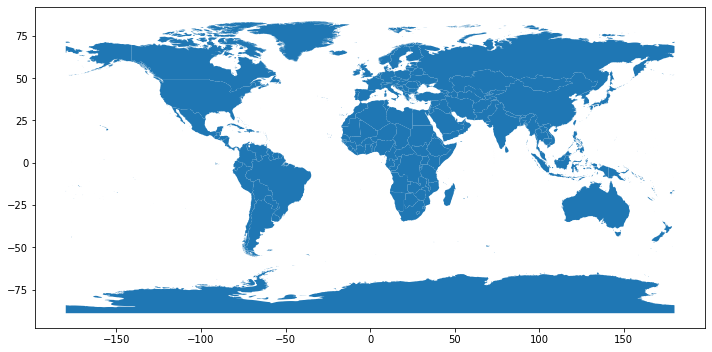

In [26]:
# checking the map data
world_map.plot(figsize = (12,8)) #(cmap = 'Spectral', figsize = (12,8), column='COUNTRYAFF')

In [27]:
# viewing the way the columns are set up
display(world_map.head(3))

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
0,1,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14..."
1,2,United States Minor Outlying Islands,UM,United States,US,0.480216,0.003216,"MULTIPOLYGON (((-160.02114 -0.39805, -160.0281..."
2,3,Cook Islands,CK,New Zealand,NZ,0.980664,0.013073,"MULTIPOLYGON (((-159.74698 -21.25667, -159.793..."


In [28]:
# merge the map with the overweight children data
# whole dataset
overweight_map_all = world_map.merge(overweight_filtered6, on='COUNTRYAFF')

# just bmi merged
overweight_map = world_map.merge(overweight_by_bmi, on='COUNTRYAFF')
#display(overweight_map.head(3))

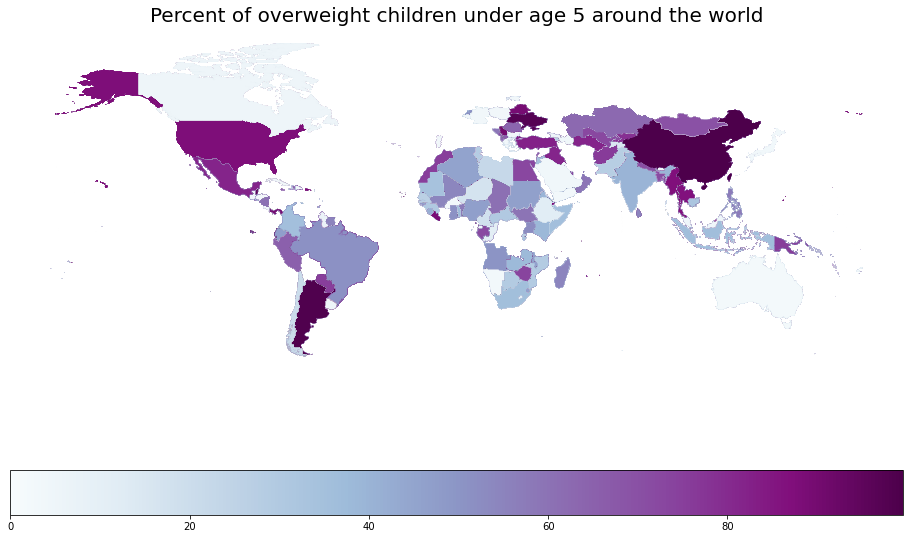

In [29]:
# map with all types of overweight indicators
vmin, vmax = 0, np.nanmax(overweight_map_all['Observation Value'].values)

fig, ax = plt.subplots(1, figsize = (16,12))
overweight_map_all.plot(column='Observation Value', cmap='BuPu', ax=ax)
bar_info = plt.cm.ScalarMappable(cmap='BuPu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
ax.set_title('Percent of overweight children under age 5 around the world', fontdict={'fontsize':20})
ax.set_axis_off()
bar_info._A = []
cbar = fig.colorbar(bar_info, orientation='horizontal')

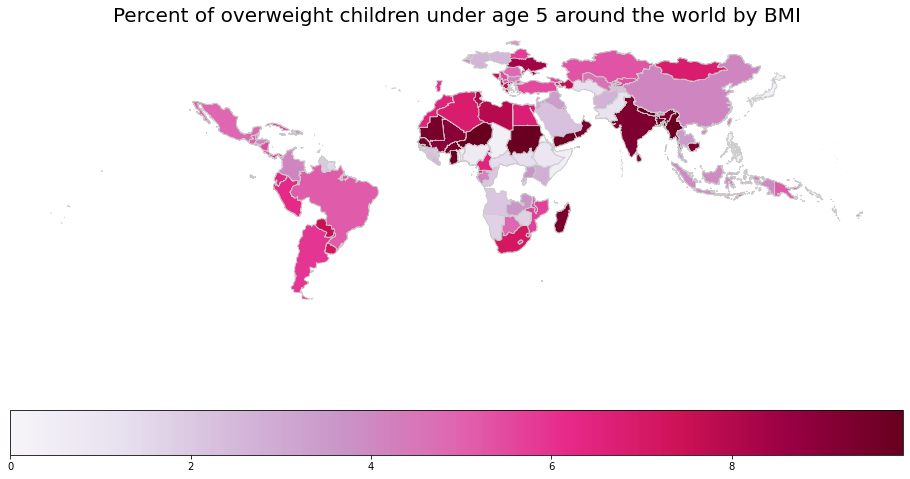

In [34]:
# map with just bmi overweight indicators
## https://www.kaggle.com/zmcddn/animated-geographical-visualization-with-matplotli

to_be_mapped = 'Observation Value'
vmin, vmax = 0, np.nanmax(overweight_map['Observation Value'].values)
fig, ax = plt.subplots(1, figsize=(16,12))

overweight_map.plot(column=to_be_mapped, 
                             cmap='PuRd', 
                             linewidth=0.8, 
                             ax=ax, 
                             edgecolors='0.8')
ax.set_title('Percent of overweight children under age 5 around the world by BMI', fontdict={'fontsize':20})
ax.set_axis_off()

sm = plt.cm.ScalarMappable(cmap='PuRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, orientation='horizontal')

In [33]:
print('Maximum observation', np.nanmax(overweight_map['Observation Value'].values), '%')
print('Minimum observation', np.nanmin(overweight_map['Observation Value'].values), '%')

Maximum observation 99.6 %
Minimum observation -0.0 %


In [32]:
print('Maximum year', overweight_map['Time period'].max())
print('Minimum year', overweight_map['Time period'].min())

Maximum year 2020
Minimum year 1970


### Animation attempts

In [41]:
## https://towardsdatascience.com/how-to-make-a-gif-map-using-python-geopandas-and-matplotlib-cd8827cefbc8

# list of years
min_year = 2000 #int(overweight_map['Time period'].min())
max_year = int(overweight_map['Time period'].max())+1
list_of_years = list(range(min_year, max_year))
#print(list_of_years)

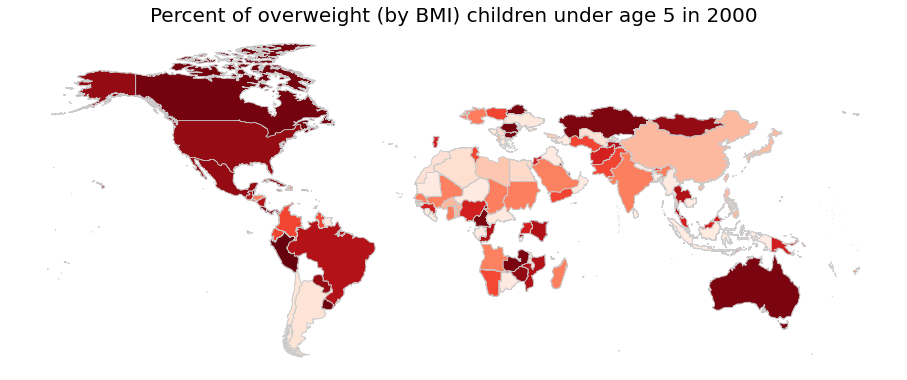

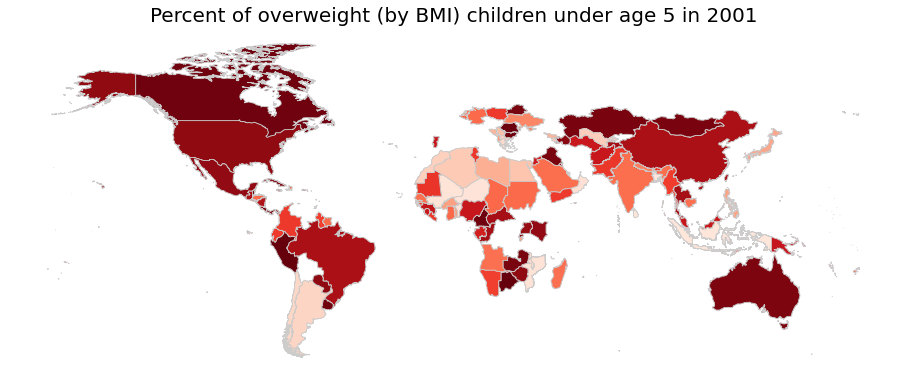

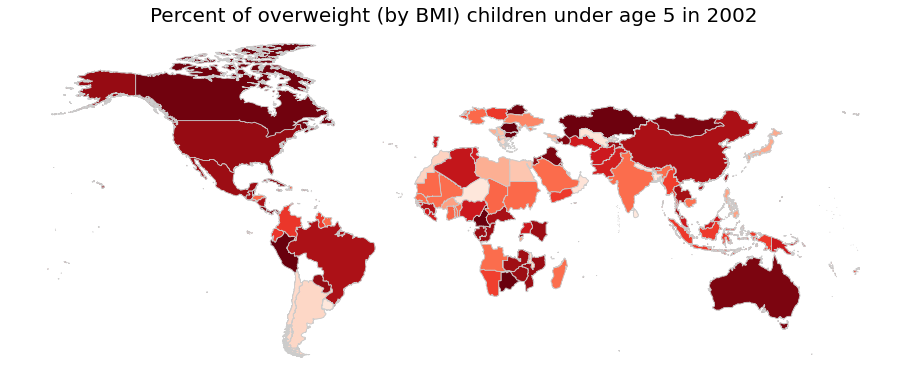

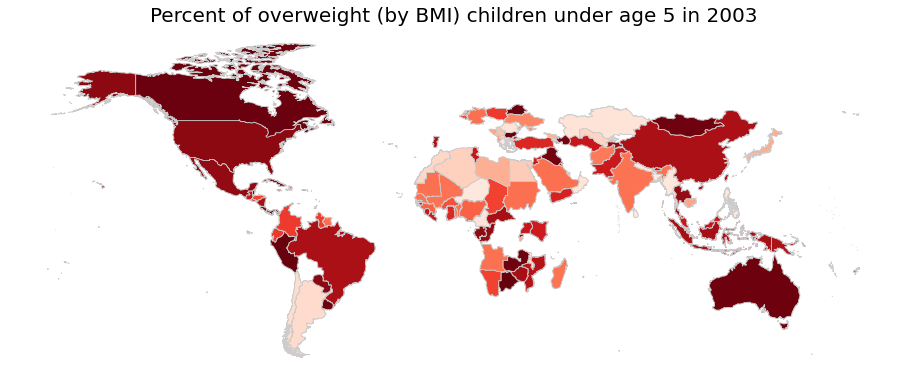

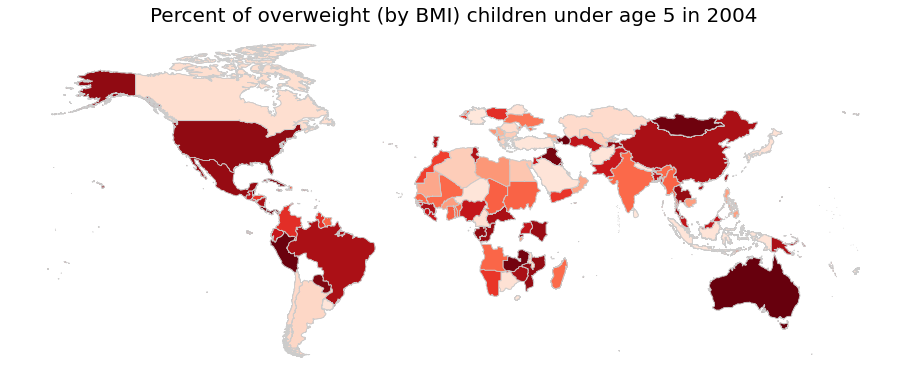

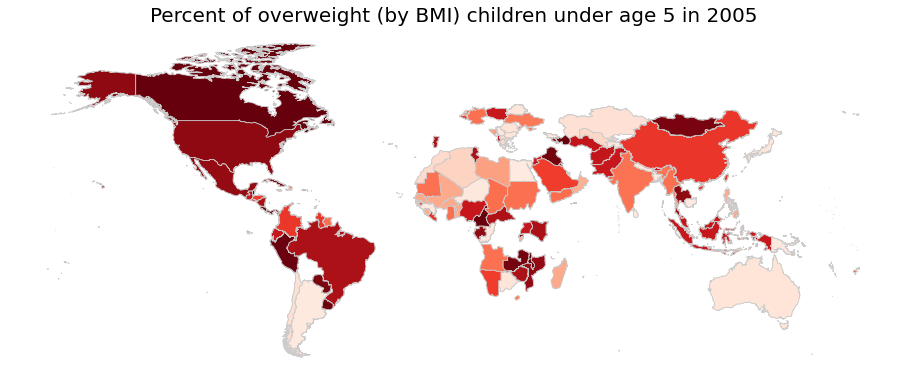

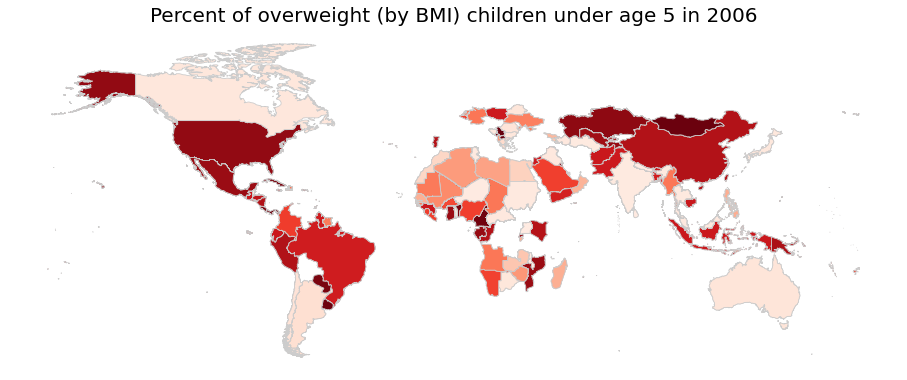

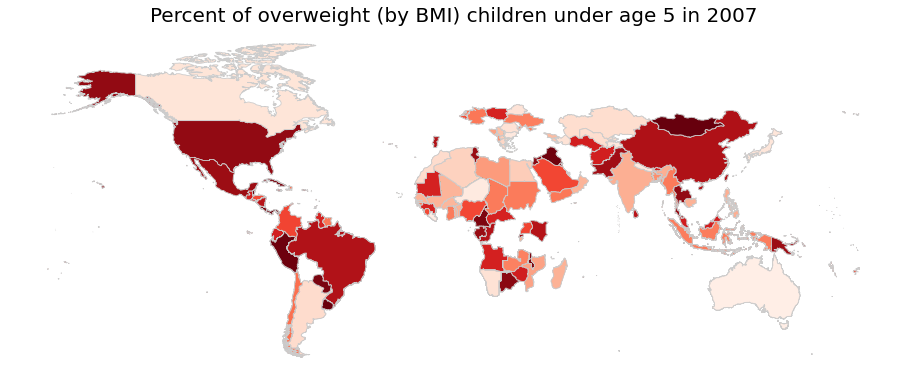

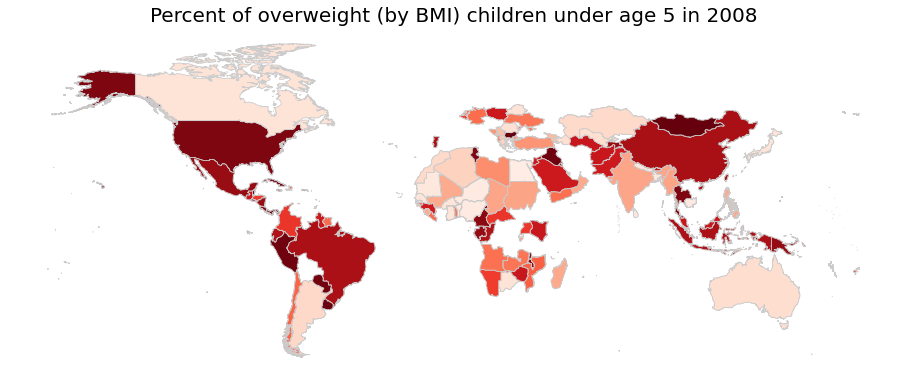

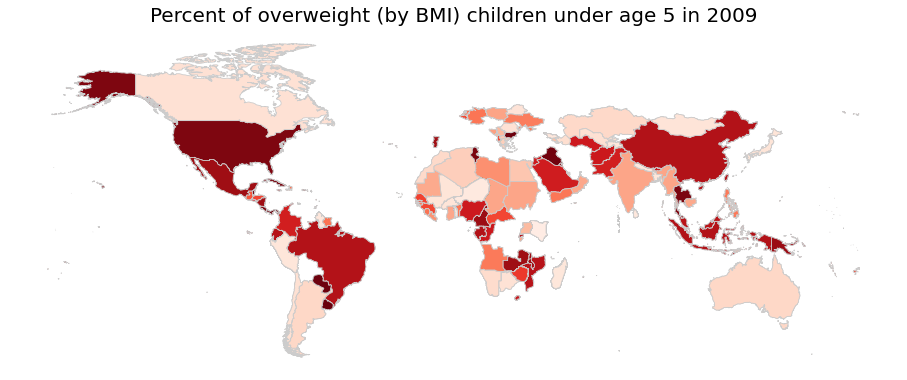

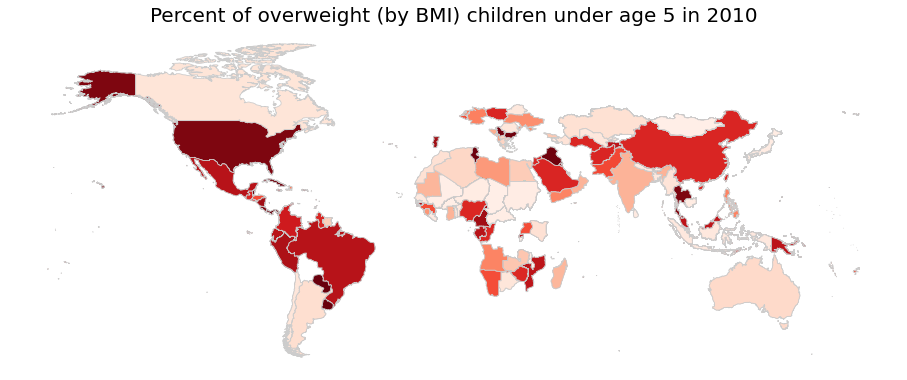

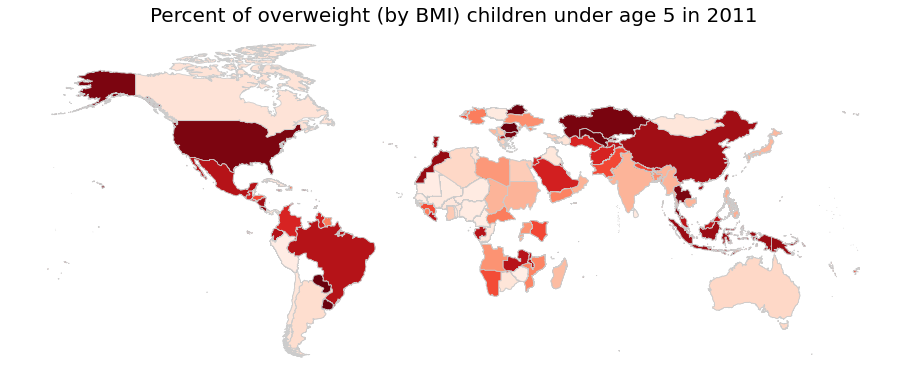

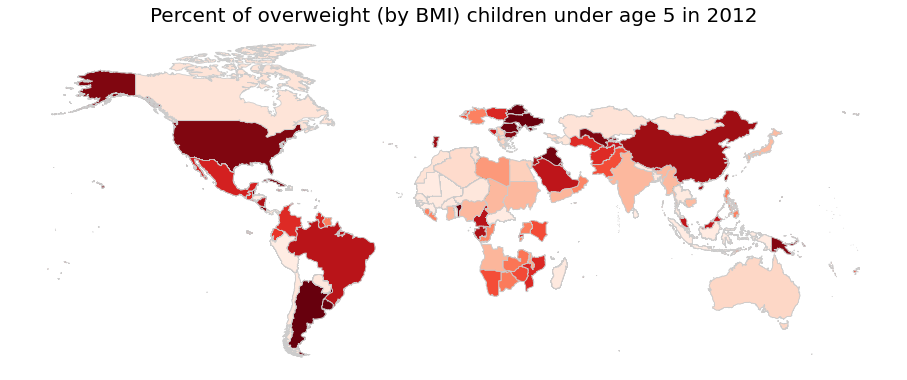

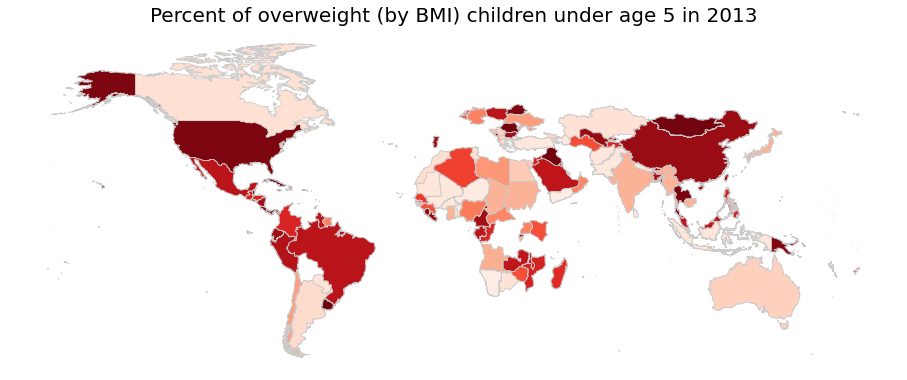

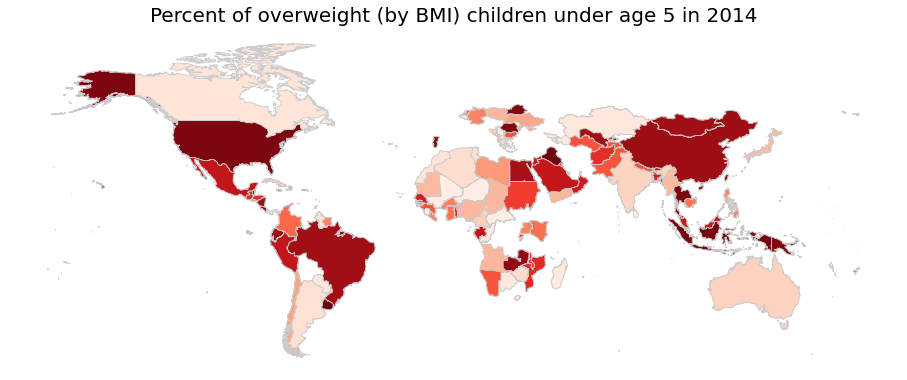

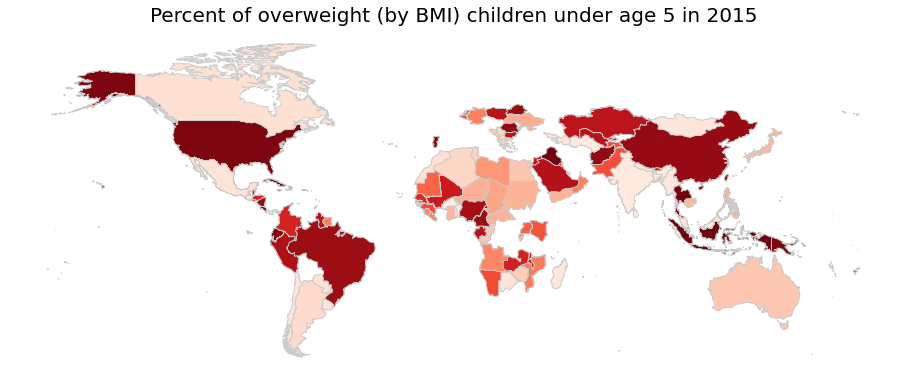

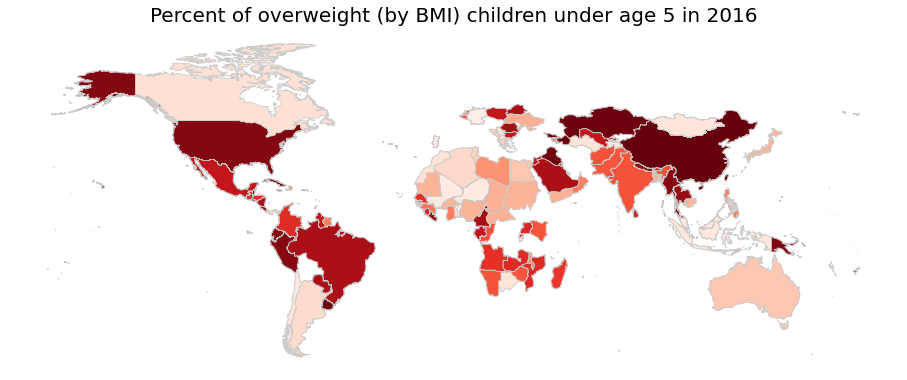

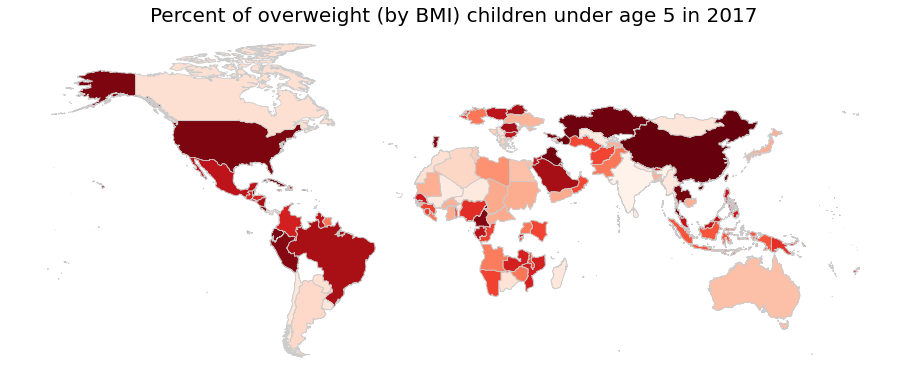

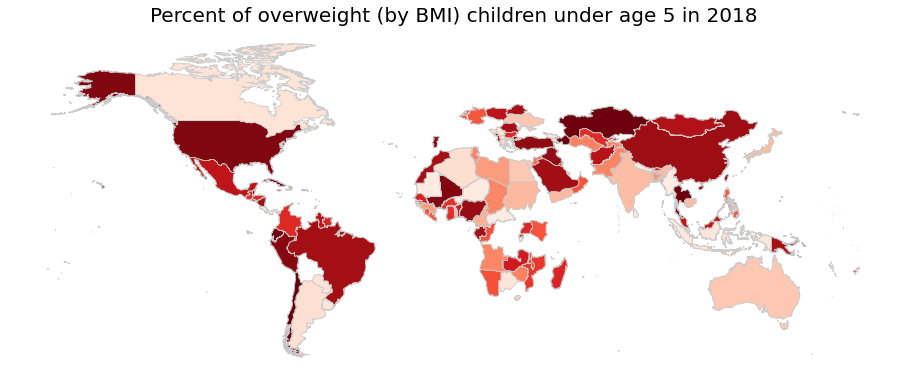

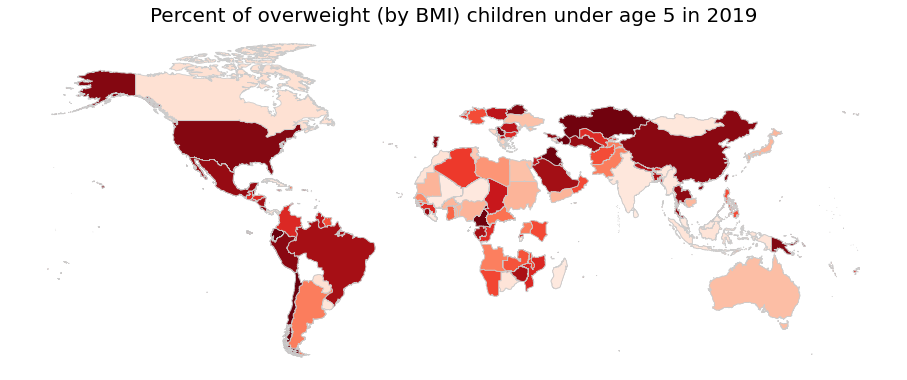

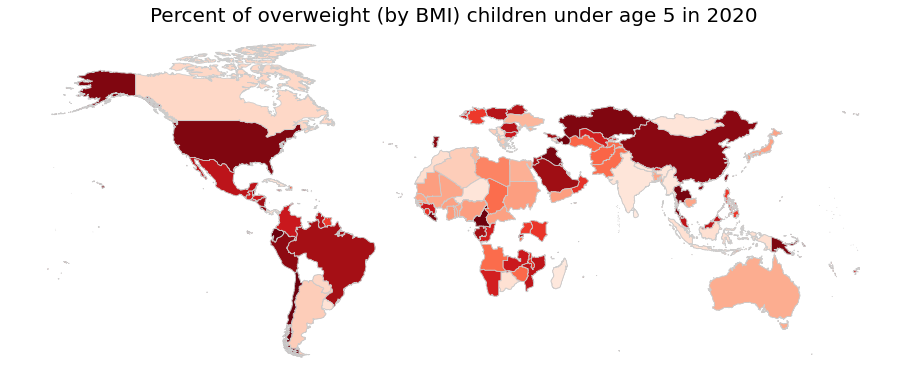

In [42]:
# save all the maps in the charts folder
import os
output_path = '/Users/Kimberly/Documents/GitHub/WinterProject/Data'
filenames = []

# start the for loop to create one map per year
for year in list_of_years:
    # narrow the data to the year desired
    owm_yearly = overweight_map_all.loc[overweight_map_all['Time period'] == str(year)].reset_index(drop=True)
#     bmi = overweight_by_bmi.loc[overweight_by_bmi['Time period'] == str(year)]
#     owm_yearly = world_map.merge(overweight_by_bmi, on='COUNTRYAFF')
    #print('merged length (should remain the same):', len(owm_yearly))
    
    # create map
    fig, ax = plt.subplots(1, figsize=(16,12))
    fig = owm_yearly.plot(column=to_be_mapped, 
                          cmap='Reds', 
                          figsize=(16,12), 
                          linewidth=0.8, 
                          edgecolor='0.8',
                          ax=ax)
    
    # remove axis of chart
    fig.axis('off')
    
    # add a title
    ax.set_title('Percent of overweight children under age 5 in ' + str(year), \
              fontdict={'fontsize': '20',
                         'fontweight' : '3'})
    
    # legend as color bar
    ax.set_axis_off()
#     sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
#     sm._A = []
#     cbar = fig.colorbar(sm, orientation='horizontal')
    
    # this will save the figure as a high-res jpg
    filename = str(year)+'_overweight.jpg'
    filepath = os.path.join(output_path, filename)
    filenames.append(filename)
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)

In [44]:
## https://stackoverflow.com/questions/753190/programmatically-generate-video-or-animated-gif-in-python
import glob
from PIL import Image

# filepaths
fp_in = '/Users/Kimberly/Documents/GitHub/WinterProject/Data/*_overweight.jpg' #"/path/to/image_*.png"
fp_out = "/Users/Kimberly/Documents/GitHub/WinterProject/Data/ow.gif"

# https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
#img, *imgs = [Image.open(f.join(fp_in)) for f in filenames] #sorted(glob.glob(fp_in))]
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=200, loop=3)

#### Last modified: 01/02/2022